# Ejercicio para entregar

Edward Morales - Julian Acevedo

## 1. Descargue el conjunto de datos y formatéelo como un DataFrame de pandas.

In [35]:
import pandas as pd

url = "https://raw.githubusercontent.com/lihkirun/AppliedStatisticMS/main/DataVisualizationRPython/Lectures/Python/PythonDataSets/athlete_events.csv"
df = pd.read_csv(url)



In [36]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Eliminacion de la comuna "ID"

In [37]:
df.drop("ID", axis=1, inplace=True)
df.head()


,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [38]:

# Información general del DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     261642 non-null  float64
 3   Height  210945 non-null  float64
 4   Weight  208241 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Games   271116 non-null  object 
 8   Year    271116 non-null  int64  
 9   Season  271116 non-null  object 
 10  City    271116 non-null  object 
 11  Sport   271116 non-null  object 
 12  Event   271116 non-null  object 
 13  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 29.0+ MB


In [11]:
# Resumen estadístico de las columnas numéricas
print(df.describe())

                 Age         Height         Weight           Year
count  261642.000000  210945.000000  208241.000000  271116.000000
mean       25.556898     175.338970      70.702393    1978.378480
std         6.393561      10.518462      14.348020      29.877632
min        10.000000     127.000000      25.000000    1896.000000
25%        21.000000     168.000000      60.000000    1960.000000
50%        24.000000     175.000000      70.000000    1988.000000
75%        28.000000     183.000000      79.000000    2002.000000
max        97.000000     226.000000     214.000000    2016.000000


En esta caso no tiene sentido analizar Year, en Age podemos ver que la edad probedio de los atletas es 25, muy cercana a la mediana por lo que podrian ser simetricos, la edad minimo y maxima estan muy separadas (ambas algo raras, 10 años es muy joven y 97 muy mayor pero son posibles), pero la desviación estandar no es muy grande. Para el peso y la altura pasa lo mismo la media y la mediana casi que iguales, pero estas ya tiene una desviación estanda un poco más grande, pero controlada. 

In [13]:
# Contar valores únicos en una columna específica, por ejemplo, 'Team', en este caso, el pais
print(df['Team'].value_counts())

# Número de valores únicos en cada columna
print(df.nunique())

# Valores únicos en una columna específica, por ejemplo, 'Medal'
print(df['Medal'].unique())

Team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
                 ...  
Briar                1
Hannover             1
Nan-2                1
Brentina             1
Digby                1
Name: count, Length: 1184, dtype: int64
Name      134732
Sex            2
Age           74
Height        95
Weight       220
Team        1184
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         66
Event        765
Medal          3
dtype: int64
[nan 'Gold' 'Bronze' 'Silver']


## 2. Filtrar el DataFrame para Ganadores de Medallas de 2016

In [18]:
df_2016 = df[(df['Year'] == 2016) & df['Medal'].notna()]


## 3. Descubrir las Medallas Concedidas en 2016 por Deporte

In [21]:
medals_by_sport = df_2016['Sport'].value_counts()
medals_by_sport


Sport
Athletics                192
Swimming                 191
Rowing                   144
Football                 106
Hockey                    99
Handball                  89
Cycling                   84
Canoeing                  82
Water Polo                78
Rugby Sevens              74
Basketball                72
Volleyball                72
Wrestling                 72
Gymnastics                66
Fencing                   65
Judo                      56
Boxing                    51
Sailing                   45
Shooting                  45
Equestrianism             45
Weightlifting             45
Diving                    36
Taekwondo                 32
Synchronized Swimming     32
Badminton                 24
Tennis                    24
Table Tennis              24
Archery                   24
Rhythmic Gymnastics       18
Beach Volleyball          12
Triathlon                  6
Modern Pentathlon          6
Trampolining               6
Golf                       6
Name: co

## 4. Enumerar los Cinco Deportes Más Importantes


In [23]:
top_five_sports = medals_by_sport.head(5).index.tolist()
top_five_sports

['Athletics', 'Swimming', 'Rowing', 'Football', 'Hockey']

## 5. Generar un Gráfico de Barras para los Cinco Deportes Principales

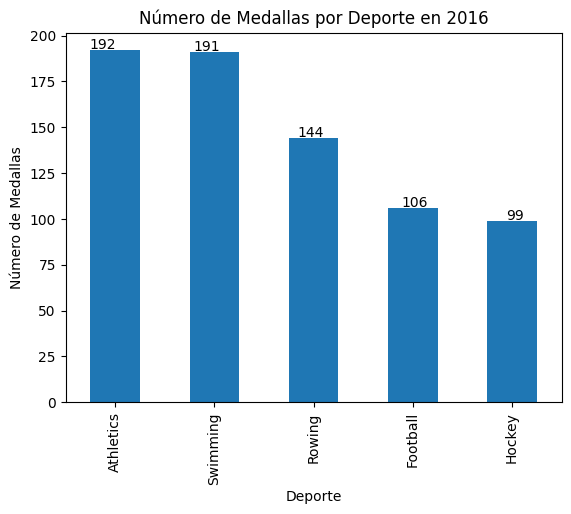

In [46]:
import matplotlib.pyplot as plt

medals_by_sport = medals_by_sport.head(5)
ax = medals_by_sport.plot(kind='bar')
plt.title('Número de Medallas por Deporte en 2016')
plt.xlabel('Deporte')
plt.ylabel('Número de Medallas')

# Agregar el valor exacto encima de cada barra
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.005))

plt.show()

Se ve claramnete el numero de medallas totales entrgas por cada deporte, siendo el primero el atletismo con 192 y el quinto Hockey con 99.

## 6. Generar un Histograma para la Edad de los Ganadores de Medallas

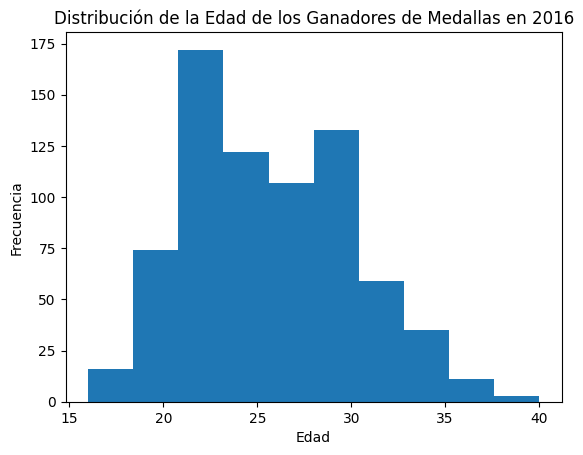

In [25]:
df_2016[df_2016['Sport'].isin(top_five_sports)]['Age'].plot(kind='hist', bins=10)
plt.title('Distribución de la Edad de los Ganadores de Medallas en 2016')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


Aqui vemos algo parecido a lo que analisamos antes, la mediana es 25 aporx y en su mayoria gana los deportistas entre 20 y 30 años 

## 7. Gráfico de Barras de Medallas por Equipo Nacional

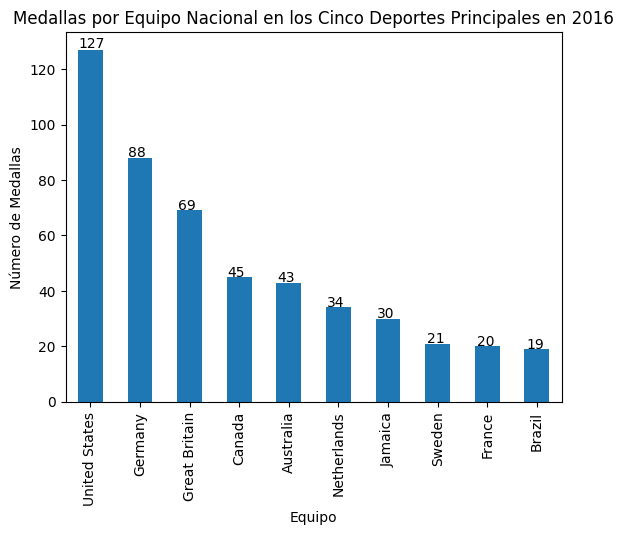

In [50]:
medals_by_team = df_2016[df_2016['Sport'].isin(top_five_sports)].groupby('Team')['Medal'].count().sort_values(ascending=False)

medals_by_team = medals_by_team.head(10) # Muestra los 10 equipos principales
ax = medals_by_team.plot(kind='bar')
plt.title('Medallas por Equipo Nacional en los Cinco Deportes Principales en 2016')
plt.xlabel('Equipo')
plt.ylabel('Número de Medallas')

# Agregar el valor exacto encima de cada barra
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


plt.show()


Aqui se identifaca los 10 países  que más medallas ganaron en estos 5 deportes considerados más importantes en 2016, siendo el lider USA, seguido de Alemania e Inglaterra.

## 8. Gráfico de Barras del Peso Medio por Género

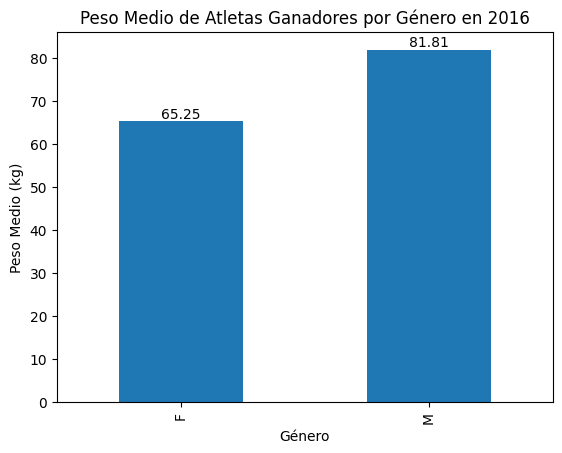

In [55]:
average_weight = df_2016[df_2016['Sport'].isin(top_five_sports)].groupby('Sex')['Weight'].mean()
average_weight = average_weight.plot(kind='bar')
plt.title('Peso Medio de Atletas Ganadores por Género en 2016')
plt.xlabel('Género')
plt.ylabel('Peso Medio (kg)')

# Agregar el valor exacto encima de cada barra
for p in average_weight.patches:
    average_weight.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()



En este grafico se ve el peso medio de los deportistas segun el genero (los que participaron en las 5 competencias más importantes en 2016), y se ve como en los hombres de de 81.81 Kilogramos mientras la smujeres pesan en promedio 65.25

# Segunda parte

## 2. Filtrar el DataFrame para Ganadores de Medallas de 2016 en los Deportes Específicos


In [28]:
sports = ['Athletics', 'Swimming', 'Rowing', 'Football', 'Hockey']
df_2016_sports = df[(df['Year'] == 2016) & (df['Sport'].isin(sports)) & df['Medal'].notna()]


## 3. Observar las Características del Conjunto de Datos

In [57]:
print(df_2016_sports.describe()) 
print(df_2016_sports.info())

              Age      Height      Weight    Year
count  732.000000  729.000000  727.000000   732.0
mean    25.577869  180.023320   73.720770  2016.0
std      4.451373   10.076398   14.279014     0.0
min     16.000000  150.000000   40.000000  2016.0
25%     22.000000  173.000000   64.000000  2016.0
50%     25.000000  180.000000   72.000000  2016.0
75%     29.000000  187.000000   82.000000  2016.0
max     40.000000  207.000000  136.000000  2016.0
<class 'pandas.core.frame.DataFrame'>
Index: 732 entries, 158 to 271019
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    732 non-null    object 
 1   Sex     732 non-null    object 
 2   Age     732 non-null    float64
 3   Height  729 non-null    float64
 4   Weight  727 non-null    float64
 5   Team    732 non-null    object 
 6   NOC     732 non-null    object 
 7   Games   732 non-null    object 
 8   Year    732 non-null    int64  
 9   Season  732 non-null    object 
 

Podemos ver una descripcion genaral de los datos y que contiene cada variable.

## 4. Visualización para Patrón Global de Height y Weight

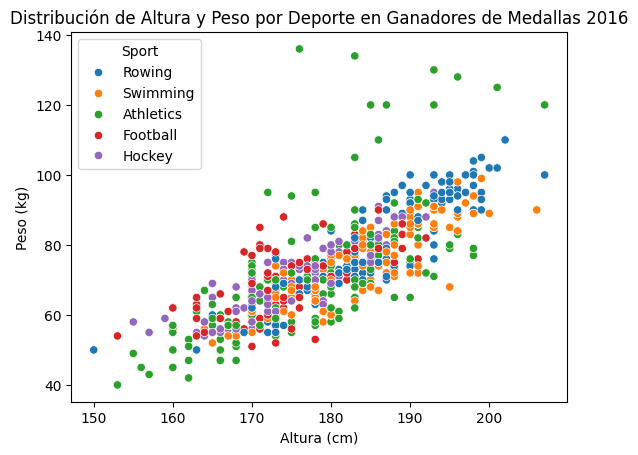

In [30]:
import seaborn as sns

sns.scatterplot(data=df_2016_sports, x='Height', y='Weight', hue='Sport')
plt.title('Distribución de Altura y Peso por Deporte en Ganadores de Medallas 2016')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.show()


El análisis de los datos de altura y peso de los atletas revela una correlación general: a mayor altura, suele incrementarse el peso. Esta tendencia se observa claramente en los deportes analizados. En particular, los atletas de remo muestran una notable cohesión en sus medidas, con alturas y pesos que tienden a agruparse estrechamente. Similarmente, los nadadores, futbolistas y jugadores de hockey presentan patrones de peso y altura comparables dentro de sus respectivos grupos.

Sin embargo, un caso interesante es el atletismo, donde se observa una amplia variabilidad en las medidas de los atletas. A pesar de la diversidad en la altura, los pesos de los atletas de atletismo varían significativamente, reflejando la diversidad de disciplinas dentro de este deporte. Esta dispersión sugiere que el atletismo, a diferencia de otros deportes, agrupa una gama más amplia de tipos corporales, adaptados a las diferentes especialidades atléticas.

## 5. Visualización de Estadísticas Resumidas de Height y Weight por Tipo de Medalla y Género

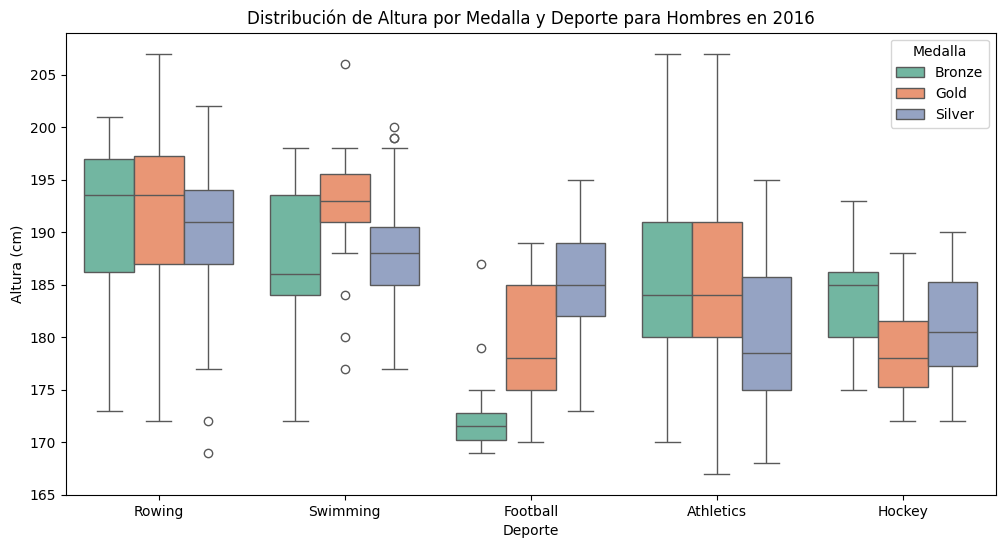

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar por género
df_2016_males = df_2016_sports[df_2016_sports['Sex'] == 'M']
df_2016_females = df_2016_sports[df_2016_sports['Sex'] == 'F']

# Altura para hombres
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sport', y='Height', hue='Medal', data=df_2016_males, palette="Set2")
plt.title('Distribución de Altura por Medalla y Deporte para Hombres en 2016')
plt.xlabel('Deporte')
plt.ylabel('Altura (cm)')
plt.legend(title='Medalla')
plt.show()


En el gráfico los deportistas de remo y los jugadores de hockey con oro muestran medianas de altura superiores en sus respectivos deportes. En contraste, el fútbol presenta la mayor variabilidad de alturas, especialmente entre los ganadores de medallas de oro, con varios valores atípicos. El atletismo muestra una tendencia interesante donde los ganadores de oro son muy similares a los de brone.

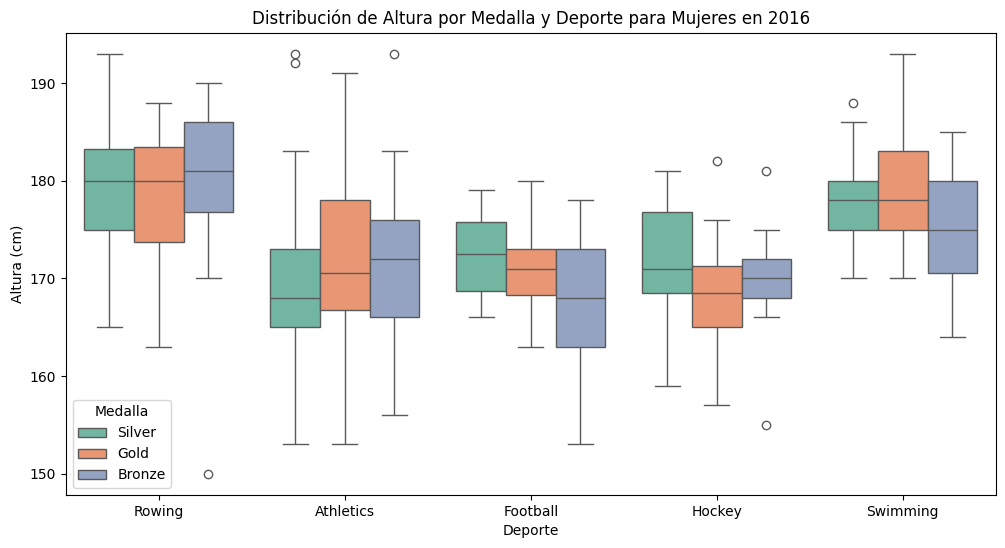

In [61]:
# Altura para mujeres
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sport', y='Height', hue='Medal', data=df_2016_females, palette="Set2")
plt.title('Distribución de Altura por Medalla y Deporte para Mujeres en 2016')
plt.xlabel('Deporte')
plt.ylabel('Altura (cm)')
plt.legend(title='Medalla')
plt.show()


Este gráfico muestra la distribución de la altura de las deportistas femeninas que ganaron medallas en los Juegos Olímpicos de 2016, diferenciada por deporte y tipo de medalla. En el remo, las atletas muestran una altura similar para las medallas de plata y oro, pero las ganadoras de bronce tienden a ser ligeramente más altas, sugiriendo que la altura puede ser un factor importante en este deporte. En el atletismo, hay una amplia variabilidad en la altura, reflejando la diversidad de eventos dentro de este deporte. Las jugadoras de fútbol tienden a ser más bajas en promedio, especialmente las que ganaron bronce, indicando que la altura no es un factor crítico en el fútbol. En el hockey, las alturas están bastante agrupadas, con algunos valores atípicos, mientras que en la natación, las nadadoras tienden a ser más altas en comparación con otros deportes, lo que podría indicar una ventaja de la altura en este deporte. En general, el gráfico revela cómo la importancia de la altura varía entre diferentes deportes y cómo puede influir en el rendimiento y el éxito olímpico.

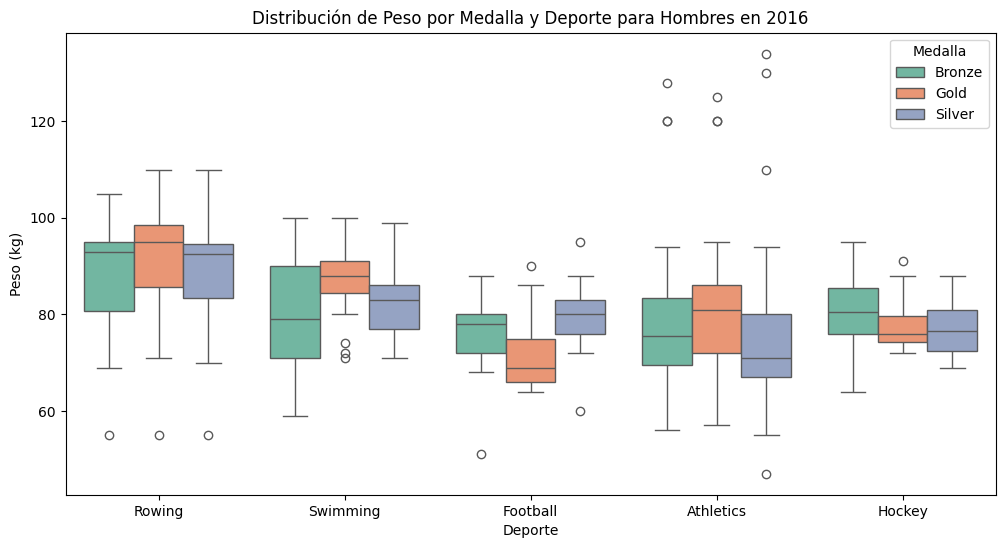

In [62]:
# Peso para hombres
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sport', y='Weight', hue='Medal', data=df_2016_males, palette="Set2")
plt.title('Distribución de Peso por Medalla y Deporte para Hombres en 2016')
plt.xlabel('Deporte')
plt.ylabel('Peso (kg)')
plt.legend(title='Medalla')
plt.show()



Este gráfico ilustra la distribución del peso de los deportistas que ganaron medallas en los Juegos Olímpicos de 2016, con un enfoque en cómo varía este parámetro entre los diferentes deportes y tipos de medalla. En el remo, observamos que los atletas que ganaron medallas de bronce y plata tienen pesos muy similares, mientras que los ganadores de oro tienden a ser ligeramente más pesados, lo que sugiere que un mayor peso podría ser ventajoso en este deporte. En la natación, hay una notable variabilidad en el peso, con los ganadores de bronce generalmente más ligeros, alrededor de 80 kg, y los de oro ligeramente más pesados, incluyendo algunos atípicos en este rango. En el fútbol, los jugadores suelen tener pesos entre 70 y 90 kg, con un caso atípico por debajo de 60 kg, mostrando una distribución de peso más uniforme. En el atletismo, se observa una amplia gama de pesos con muchos valores atípicos, tanto en las categorías de oro como de plata, reflejando la diversidad de eventos y tipos de cuerpo en este deporte. Finalmente, en el hockey, los pesos están más agrupados, con la mayoría de los jugadores rondando los 80 kg, lo que indica una homogeneidad en el perfil físico para este deporte.

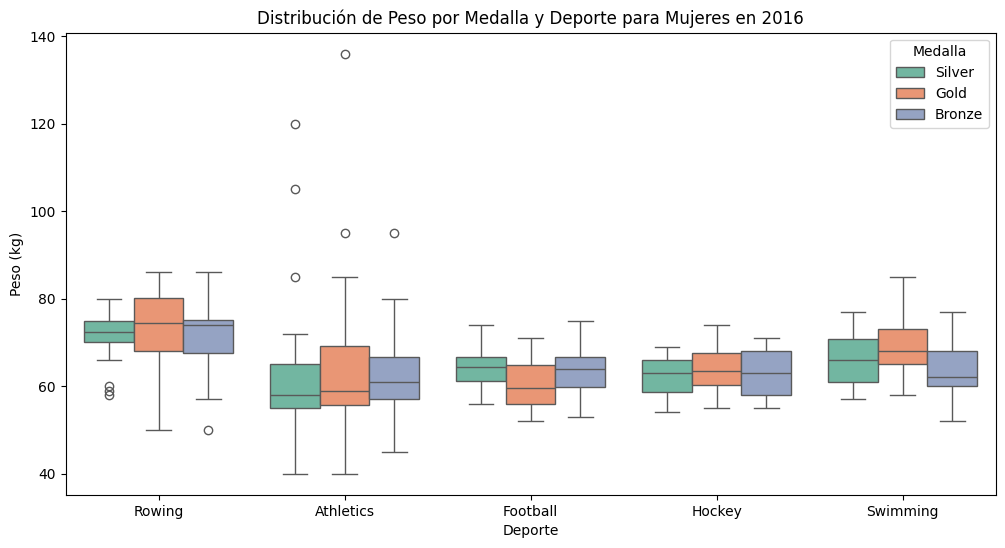

In [63]:
# Peso para mujeres
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sport', y='Weight', hue='Medal', data=df_2016_females, palette="Set2")
plt.title('Distribución de Peso por Medalla y Deporte para Mujeres en 2016')
plt.xlabel('Deporte')
plt.ylabel('Peso (kg)')
plt.legend(title='Medalla')
plt.show()

En el análisis de las deportistas femeninas que ganaron medallas en los Juegos Olímpicos de 2016, encontramos patrones interesantes en la distribución de su peso por deporte y tipo de medalla. En el remo, los pesos están muy agrupados, con una uniformidad notable entre las atletas, aunque se observan algunos valores atípicos con pesos inferiores a 60 kg. En el atletismo, destaca la presencia de numerosos datos atípicos, especialmente entre las medallistas de plata, y un caso muy atípico en la categoría de oro, con un peso superior a 120 kg, que probablemente sea un error, ya que la mayoría de las atletas en este deporte pesan menos de 60 kg. En el fútbol, hockey y natación, las distribuciones de peso son bastante homogéneas, con las cajas de los diagramas de caja muy próximas entre sí y sin bigotes excesivamente largos, lo que indica una consistencia en el perfil físico de las atletas en estos deportes.